<a href="https://colab.research.google.com/github/deepakgowtham/Datascience_Basics/blob/main/Pandas/3_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install recordlinkage

     |████████████████████████████████| 926 kB 4.0 MB/s 
     |████████████████████████████████| 132 kB 52.8 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73985 sha256=0ed60b993ce30438e02916afebce238eef46b7030f7e90a9e36dc67f44d10ea3
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [ ]:
import recordlinkage

In [ ]:
ride_sharing=pd.read_csv('https://assets.datacamp.com/production/repositories/5737/datasets/023d88638863562a427a87539e371d9f2a7190f3/ride_sharing_new.csv', index_col=0)
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [ ]:
airlines=pd.read_csv('https://assets.datacamp.com/production/repositories/5737/datasets/ba95dfa6d750e4bf2ddda2349cfe0af80ab765ff/airlines_final.csv', index_col=0)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
categories_dict={

"cleanliness" : ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty' ],
"safety"  :['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
"satisfaction": ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']}
categories=pd.DataFrame(categories_dict)
categories.head()

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [ ]:
banking =pd.read_csv('https://assets.datacamp.com/production/repositories/5737/datasets/1dad1a5b295d27a02615c633449edd2c907fed5d/banking_dirty.csv',index_col=0)
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
restaurants =pd.read_csv('https://assets.datacamp.com/production/repositories/5737/datasets/e993edc10bc1f1ae458a560a9c41617bc2e259ae/restaurants_L2.csv', index_col=0)

restaurants.head()

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [ ]:
restaurants_new = pd.read_csv('https://assets.datacamp.com/production/repositories/5737/datasets/b2d11cce6759875e60d27b5a7062747b7ada77d0/restaurants_L2_dirty.csv', index_col=0)
#restaurants_new.rename(columns={'type':'cuisine_type'}, inplace=True)
restaurants_new.head()

,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


# Common type errors
1. data type constraints, 
2. data range constrains,
3. uniqueness constraints, 
4. membership constraints

# Categorical data stored as int data type
- when categorical data is present as int data type, describe method fails to provide useful data
- so convert categrocial columns to from **int to category** 
- df['col1'] =df['col1'].astype('category')

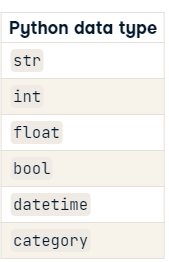

In [ ]:
ride_sharing.info(), ride_sharing['user_type'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB


(None, count    25760.000000
 mean         2.008385
 std          0.704541
 min          1.000000
 25%          2.000000
 50%          2.000000
 75%          3.000000
 max          3.000000
 Name: user_type, dtype: float64)

In [ ]:
# here the categorical column is stored as numerical
ride_sharing['user_type']=ride_sharing['user_type'].astype('category')
assert ride_sharing['user_type'].dtype =='category'

- after chaning the datatype as category the describe give useful info

In [ ]:
ride_sharing['user_type'].describe()

count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64

# Numerical data stored as string
- numerical data present with additional string like $ or here in duration column present with minutes
- remove the unwanted string with **.str.strip()** method

In [ ]:
ride_sharing['duration_int']= ride_sharing['duration'].str.strip('minutes')
ride_sharing['duration_int']=ride_sharing['duration_int'].astype('int')
assert ride_sharing['duration_int'].dtype =='int'

In [ ]:
ride_sharing['duration_int'].describe()

count    25760.000000
mean        11.389053
std         23.500516
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max       1372.000000
Name: duration_int, dtype: float64

# when a value exceeds the maximum possible value
- when movie rating is from 1 to 5 no values can be more than 5 
- we can fix this by dropping (if rows are very less) or by changing the values to maximum value

In [ ]:
ride_sharing['user_birth_year'].describe()

count    25760.000000
mean      1983.054969
std         10.010992
min       1901.000000
25%       1978.000000
50%       1985.000000
75%       1990.000000
max       2001.000000
Name: user_birth_year, dtype: float64

- example say user_birth_year cannot be more than 2000

In [ ]:
# assign values using loc
ride_sharing.loc[ride_sharing['user_birth_year'] >2000, 'user_birth_year']= 2000
ride_sharing.user_birth_year.describe()

count    25760.000000
mean      1983.054930
std         10.010925
min       1901.000000
25%       1978.000000
50%       1985.000000
75%       1990.000000
max       2000.000000
Name: user_birth_year, dtype: float64

# Furture dates problem
-  in a scenario  where date cant be greater than today
- replace dates greater than today to today's date

In [ ]:
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

NameError: ignored

# Duplicate data
- find the duplicates using the .duplicated() method
- returns boolen true for duplicate , false for non duplicated
- df[df.duplicated()] -- returns all the duplicated values -- but returns only complete duplciates and all rows are marked as duplicated except for first occurence
-subset : List of column names to check for duplication.
- keep: Whether to set false for first('first'), last('last') or all(False -- all the values are set to true and shown as duplicates) duplicate values  -- default is first
- inplace  :Drop duplicated rows directly inside DataFrame without creating new object (True).

## Complete duplicate
 - all columns of the row are matching values
 - we can easily keep one row and discard others

## Incomplete duplicate
 - only few columns of the row contain values
 - we need to analyze if it really a duplicate or geninune case
 - we use statistical methods like mean or median to combine two incomplete duplicates


 ## Drop Duplcates
 - can be done using the drop_duplicates() method
 - similar to duplicated() has keep and subset arugments
 - here keep = first is the default , last also works fine, but we can't keep false as no rows would be removed
 - inplace == drop in memory

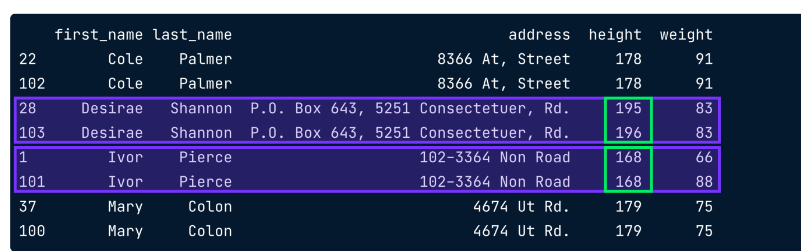

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset=['ride_id'], keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

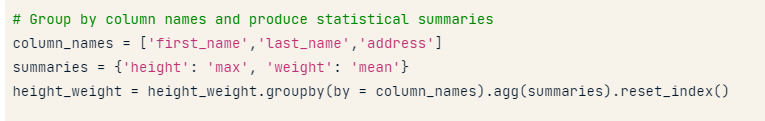

- here we are using groupby to use statistcal method max and mean to remove incomplete duplicates
- reset index is added to get continous index

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# Drop rows with wrong categories
- Use anti join to filter the data by comparing with the categories
- drop the inconsitent rows
- use the ~ symbol to drop the rows
- This is called **membership Constraint** (categorical data present outside of the defined values eg. blood type as Z+)

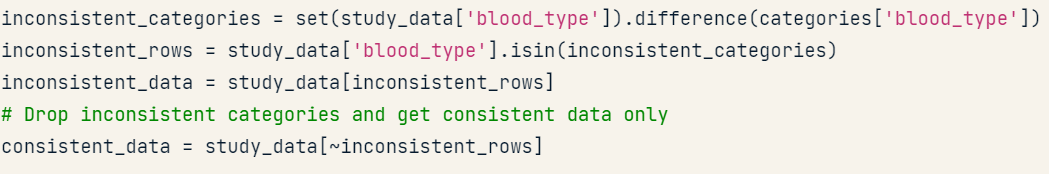

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])
# ~ tilde symbol to print rows otherthan the mentioned rows
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
        id        day  ...         safety        satisfaction
0     1351    Tuesday  ...        Neutral      Very satisfied
1      373     Friday  ...      Very safe      Very satisfied
2     2820   Thursday  ...  Somewhat safe             Neutral
3     1157    Tuesday  ...      Very safe  Somewhat satsified
4     2992  Wednesday  ...      Very safe  Somewhat satsified
...    ...        ...  ...            ...                 ...
2804  1475    Tuesday  ...        Neutral  Somewhat satsified
2805  2222   Thursday  ...      Very safe      Very satisfied
2806  2684     Friday  ...      Very safe      Very satisfied
2807  2549    Tuesday  ...  Somewhat safe      Very satisfied
2808  2162   Saturday  ...      Very safe  Somewhat satsified

[2477 rows x 12 columns]


# Value inconsistency

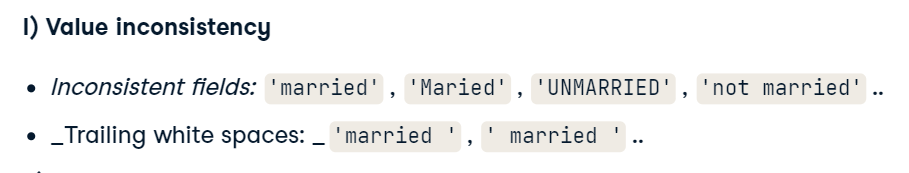

##  Mixed case
- can be fixed using .str.upper() or .str.lower()

## Trailing or leading spaces
- can be fixed using .str.strip() -- without any input removes any leading and trailing space

In [ ]:
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


# Converting continous to categorical
 

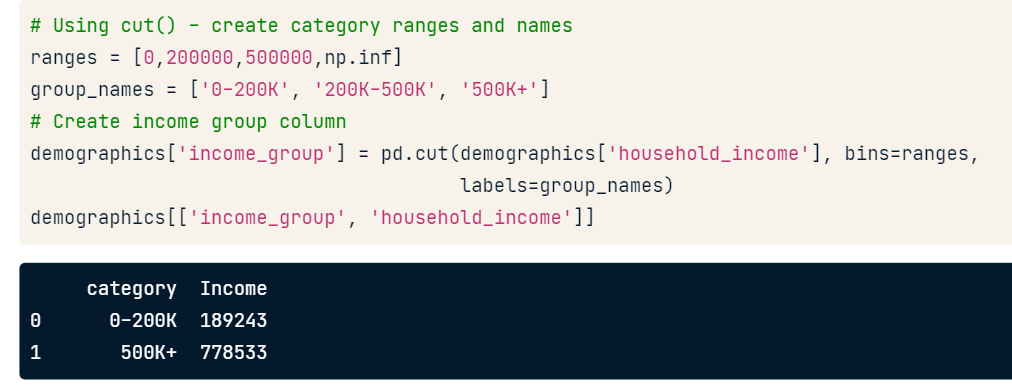

In [ ]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)



In [ ]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [ ]:
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


# Too many categories, reducing them


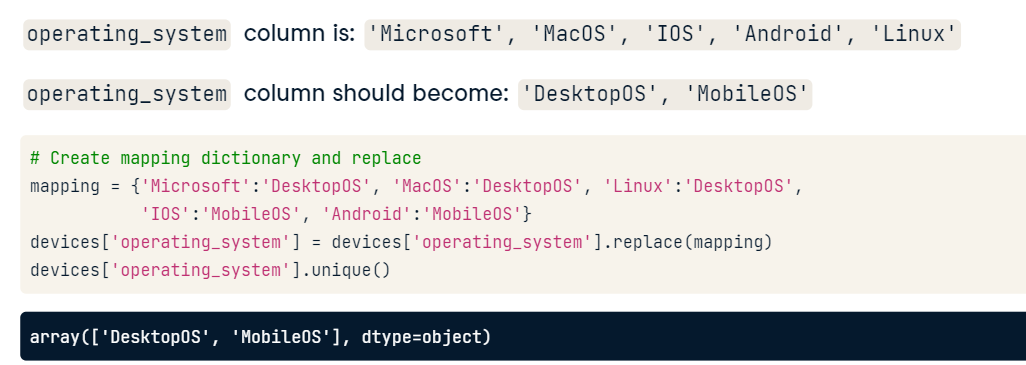

# Cleaning text data using regex
- Data length 
- Typos

- Example phone number containing +,-, invalid length
- .str.replace('+','')
- using regular expression .str.replace(r'D+', '') -- replace anything other than digits with empty space
- df['collen']= df['col1'].str.len()
- df.loc[df['collen']<10, 'collen']= np.Nan

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

# Uniformity issues
- Physical units in different scales for example kg and Pounds, Farenheit and celsius, date formats, different currency like Rupee and Dollar

- Scatter plot might help in finding these problems

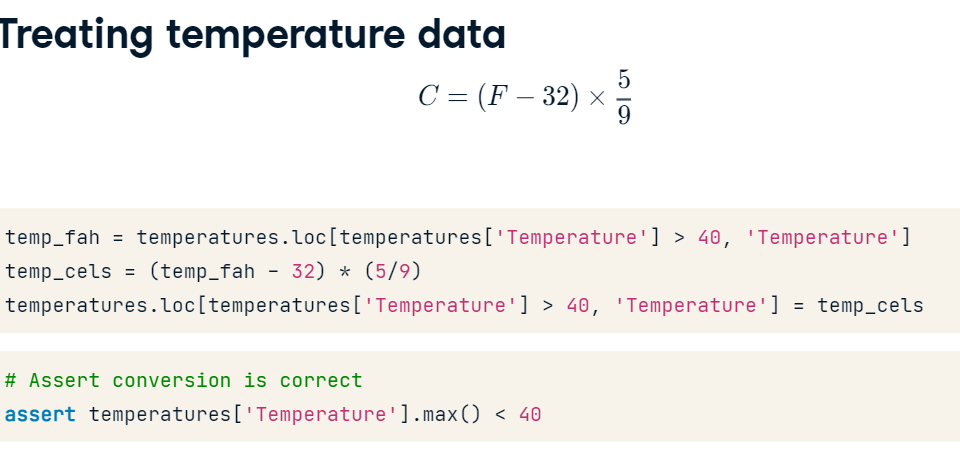

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

## Converting dates


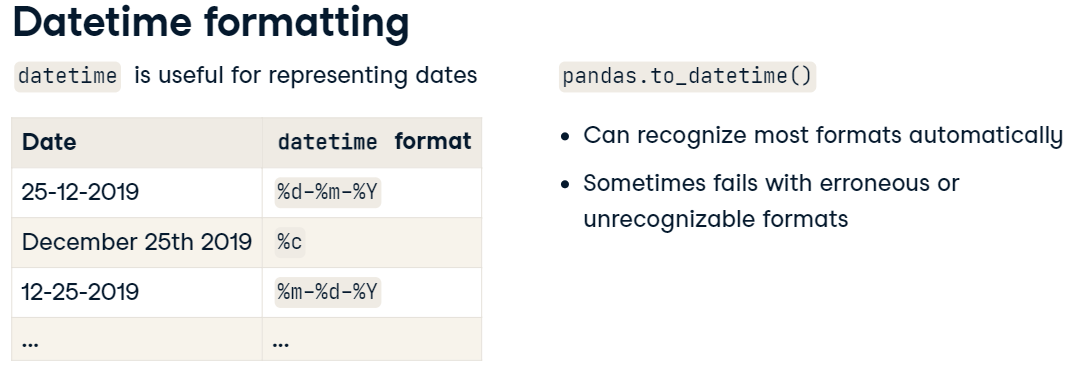

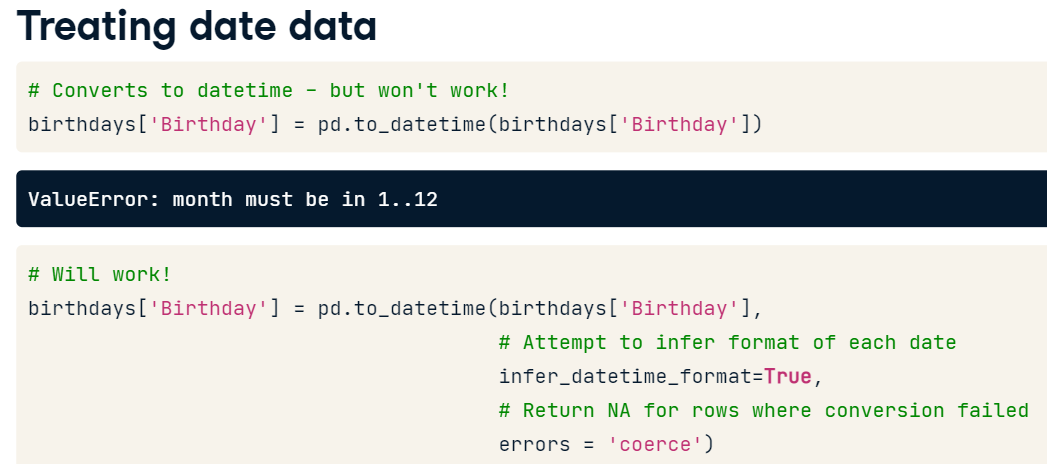

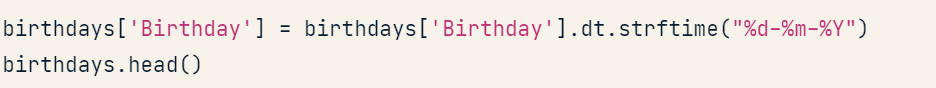

- what is this date '2021-03-08' 
- is it march or august?
- for these types of problem we need to look at the data source or drop columns or find from previous rows of data
- Set them to NA and drop them.
- Infer the format of the data in question by checking the format of subsequent and previous values.
- Infer the format from the original data source.
press


In [ ]:
banking['account_opened'].head()

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object

In [ ]:
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


# Cross field validation


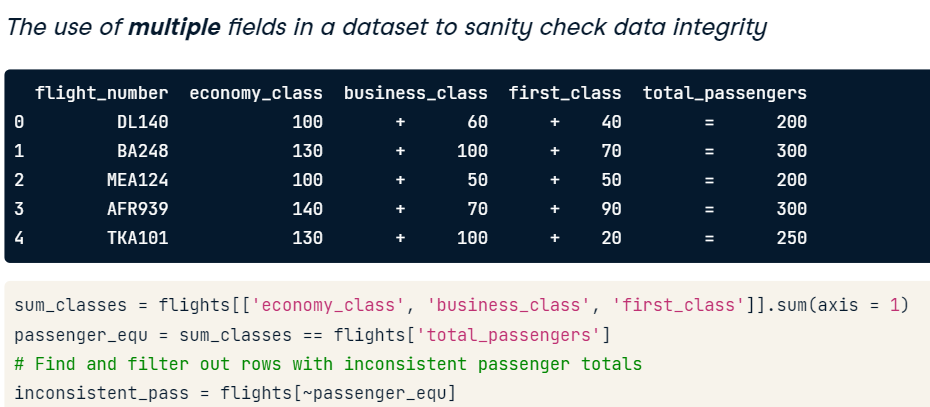

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
print(inconsistent_inv[fund_columns])

Number of inconsistent investments:  8
      fund_A    fund_B    fund_C    fund_D
4   12158.40  51281.00  13434.00  18383.00
12  18314.00   1477.00  29049.48   5539.00
22   8206.00  15019.00   5559.60   6182.00
43    314.00   6072.28  14163.00   7908.00
47  33764.00   5042.00  10659.00  19237.41
65  28615.00  21720.05  11906.00  10763.00
89   8489.36  28592.00   2439.00  30419.00
92   6467.00  20861.00   9861.00  26004.16


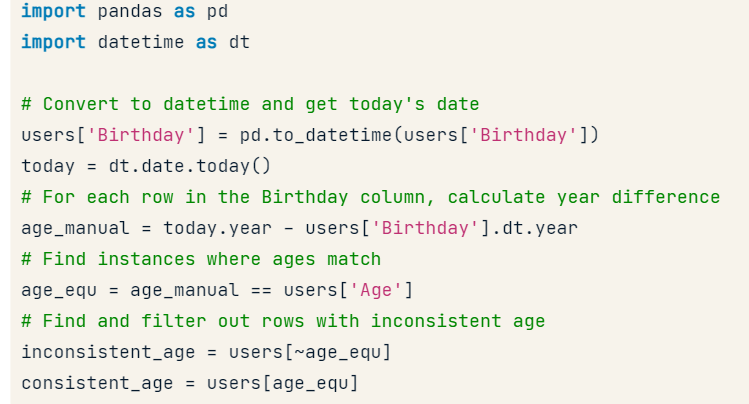

In [ ]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

# Completeness of data
- Na, Nan, 0
- df.isna().sum()

- import missingno as msno
-    shows the graphical representation of where the  missing data data
- msno.matrix(df)
- plt.show()



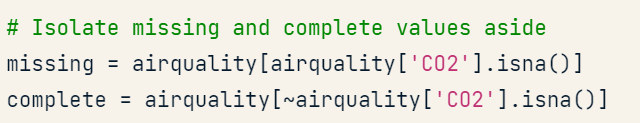

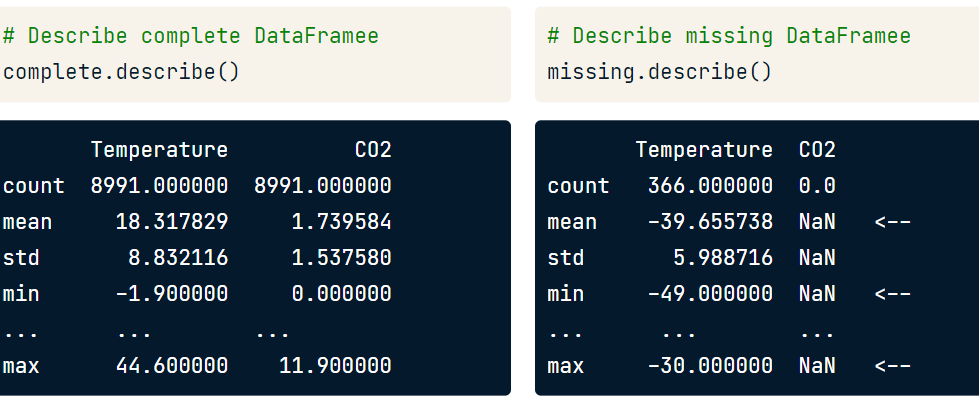

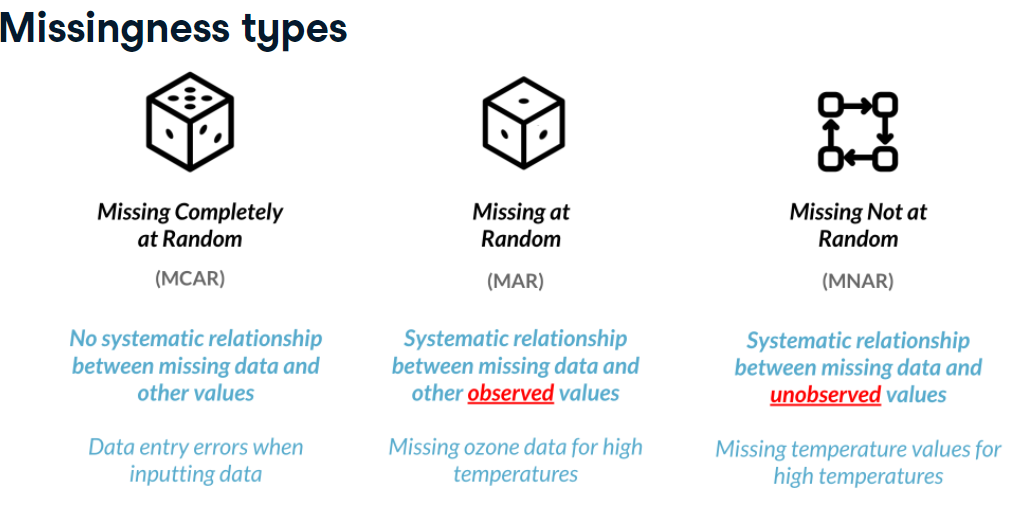

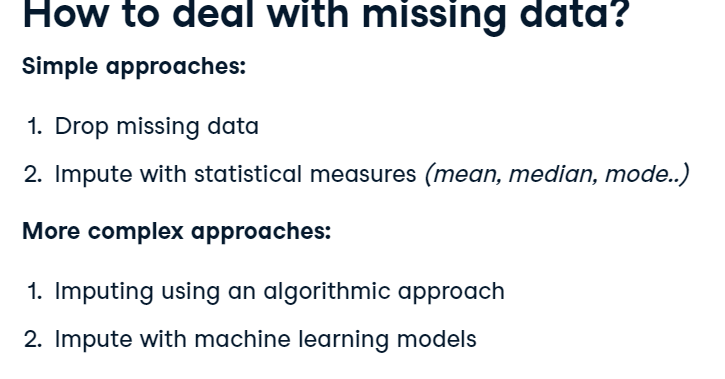

- dropna()
- fillna({'co2' : mean_value})

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


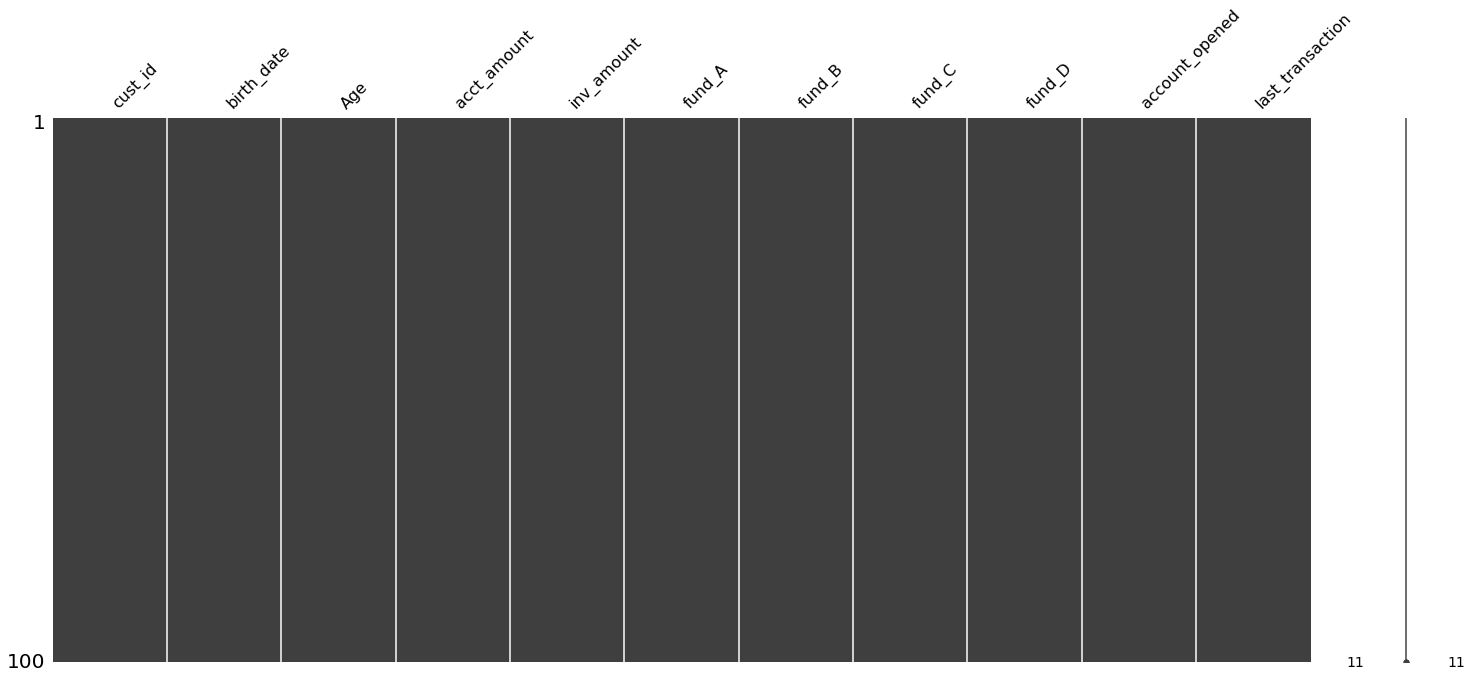

In [ ]:
import missingno as msno
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values('age')
msno.matrix(banking_sorted)
plt.show()

In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

# Correcting the category in a large dataset when manuall change is not possible.
## String Comparison
- Minimum edit distance
- when we have many typos in categories for huge dataset, we can use string similarity to fix this
- minimum edit distance is used to identify how similar two strings are. As a reminder, minimum edit distance is the minimum number of steps needed to reach from String A to String B, with the operations available being:

- Insertion of a new character.
- Deletion of an existing character.
- Substitution of an existing character.
- Transposition of two existing consecutive characters.

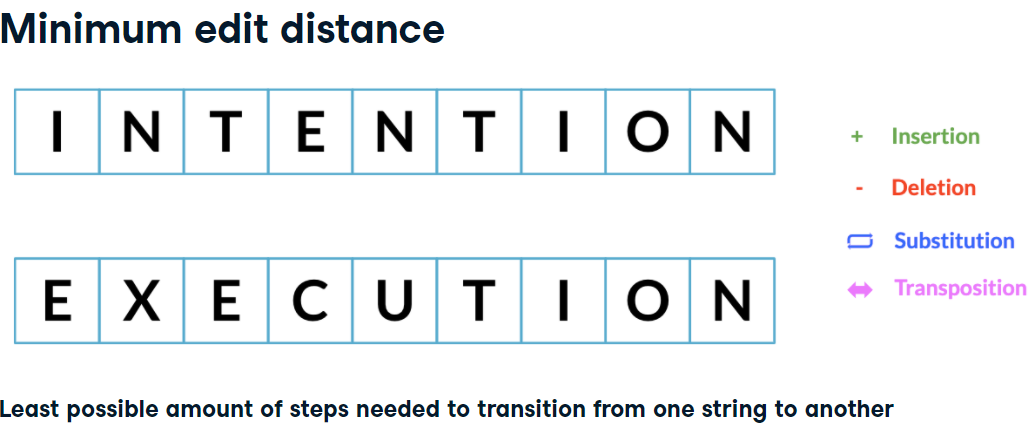

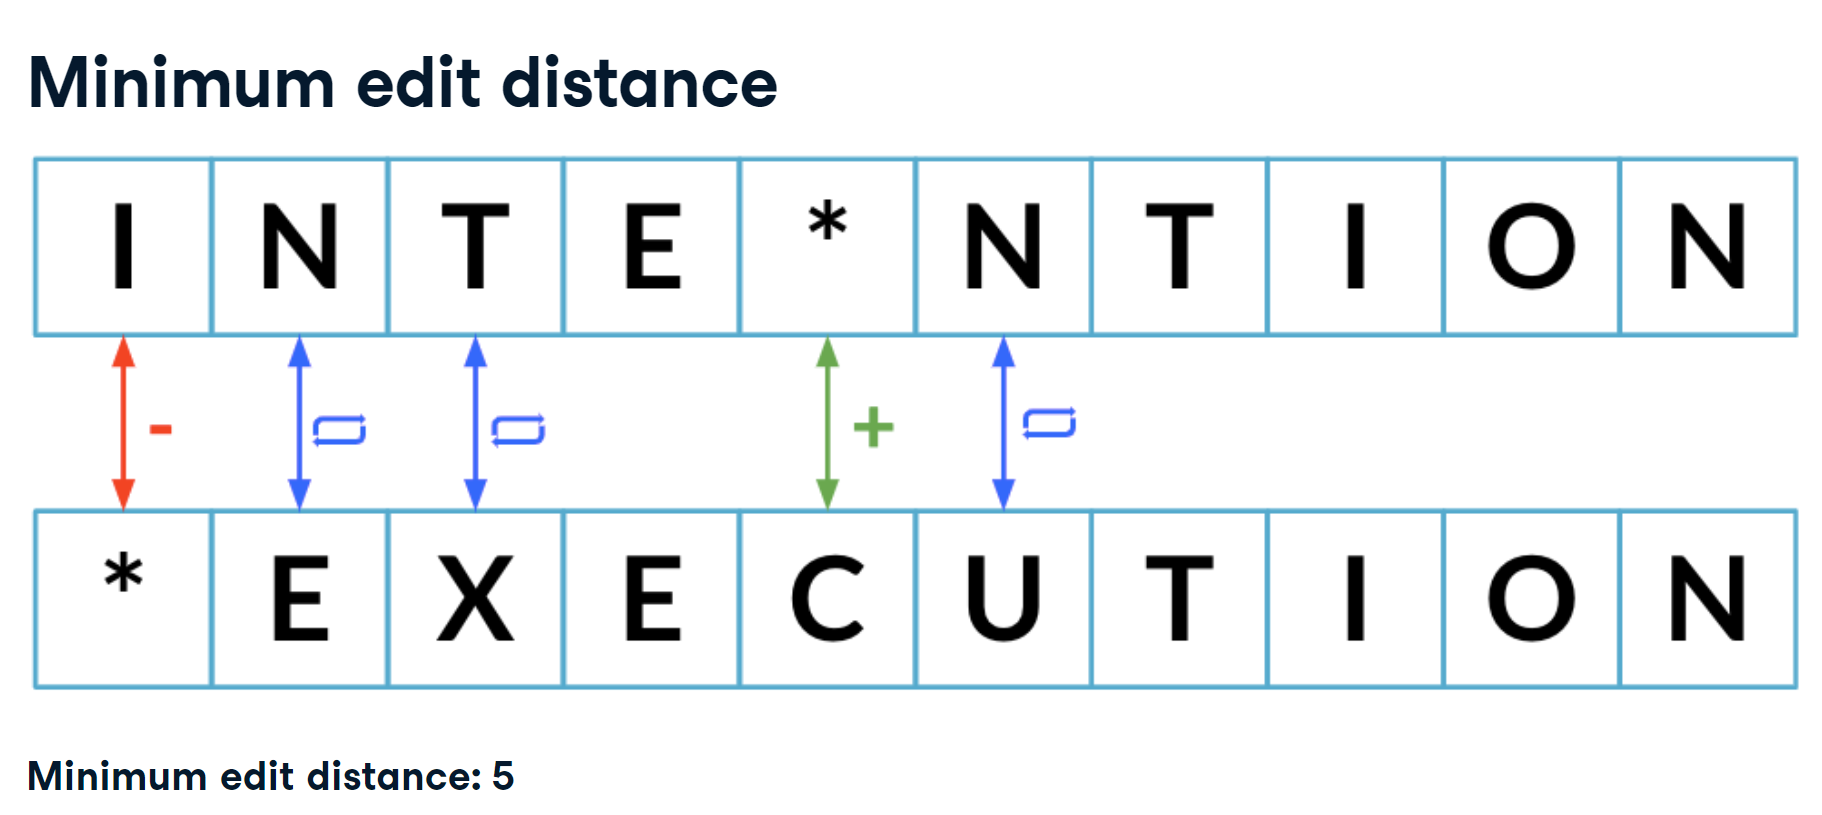

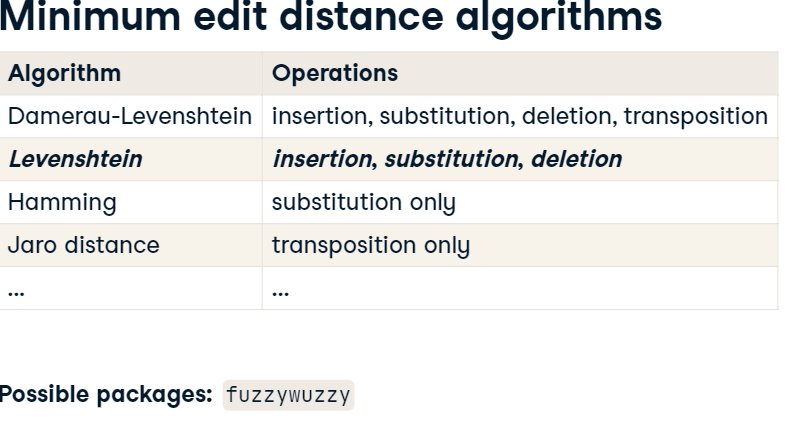

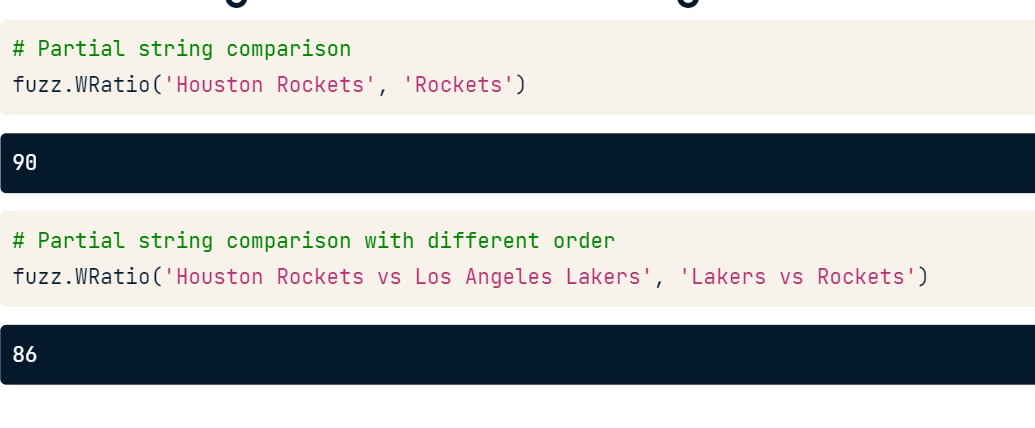

- replace strings using .replace is difficult because more variations
- when there are more typo for the category

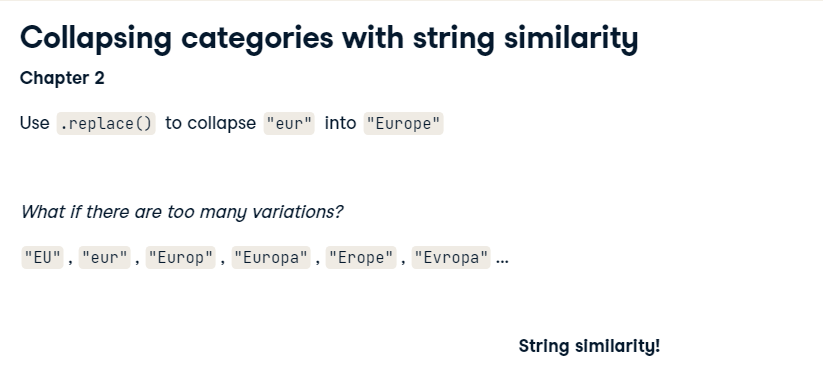

- fuzz.WRatio matches two stings and gives a score 100 being perfect match, 0 being lowest match
- for a dataset we can use process.extract from fuzzywuzzy
- process.extract('text to match', df['col1'], limit =2)
- this returns best two matching choices.

In [ ]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

ModuleNotFoundError: ignored

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >=80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type']== match[0],'cuisine_type'] ='italian'

NameError: ignored

In [ ]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

# Record Linkage - combining dataframes based after omiting common rows
- Record Linkage is the act of linking data from different sources regarding same entity.
- when rows(records) collected from two datasources are in different format when we identify the same records in similar format and combine them
- Similar to joins, record linkage is the act of linking data from different sources regarding the same entity. But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.

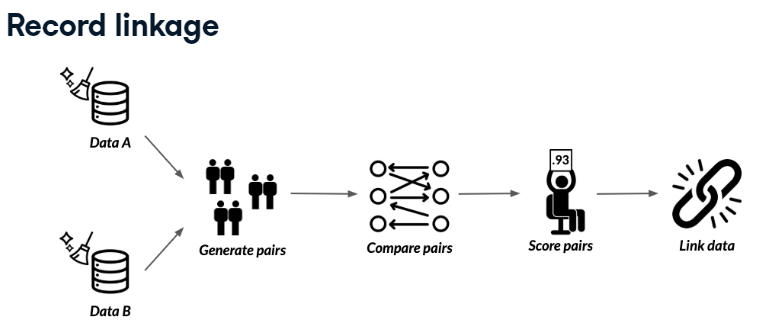

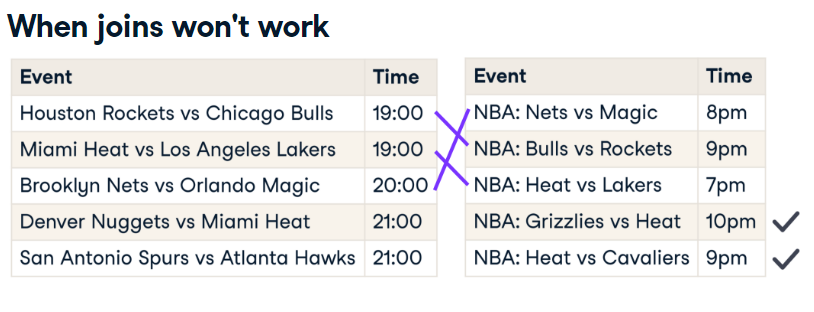

- when dataset is large creating pairs will increase the dataset to a very large size and create a huge problem to avoid this we can use **blocking** where we can create pairs based on matching columns thereby reducing the number of rows

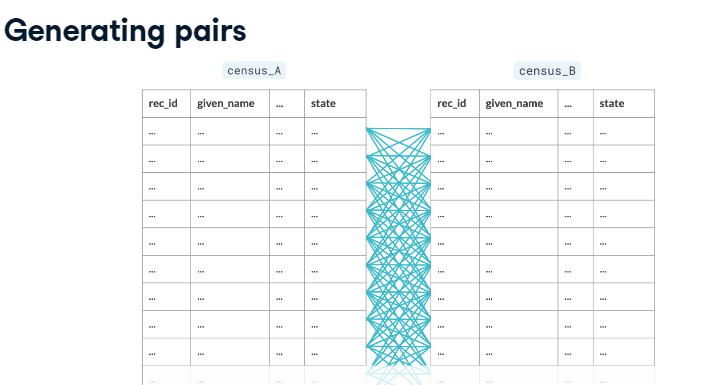

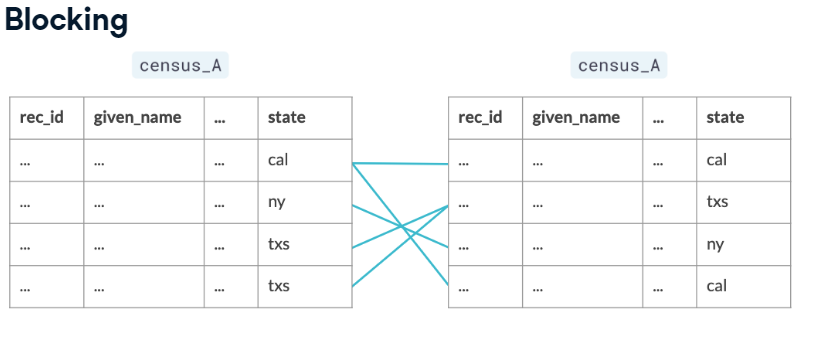

In [ ]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

- **Compare between columns, score the comparison, then link the DataFrames.**

In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]


In [ ]:
# 3 because I need to have matches in all my columns.
matches =potential_matches[potential_matches.sum(axis = 1) >= 3]
matches.head()


,,city,cuisine_type,name
0,40,1,1,1.0
1,28,1,1,1.0
2,74,1,1,1.0
3,1,1,1,1.0
4,53,1,1,1.0


## Link the dataframes based on scrores

- matches.index.get_level_values(0)
- matches.index.get_level_values('uid_1')
both these are correct

In [ ]:
# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants.head())

                        name                       addr         city  \
0  arnie morton's of chicago   435 s. la cienega blv .   los angeles   
1         art's delicatessen       12224 ventura blvd.   studio city   
2                  campanile       624 s. la brea ave.   los angeles   
3                      fenix    8358 sunset blvd. west     hollywood   
4         grill on the alley           9560 dayton way   los angeles   

        phone      type  
0  3102461501  american  
1  8187621221  american  
2  2139381447  american  
3  2138486677  american  
4  3102760615  american  
